Лабораторна робота №2
1.	Сформувати тестову вибірку зображень з вихідного пакета;
2.	Для кожного каналу кольору кожного зображення з тестового пакета обчислити наступні характеристики:
a.	Математичне сподівання і дисперсію;
b.	Коефіцієнти асиметрії та ексцесу (нормалізований);
3.	Побудувати вектори параметрів зображень, що складаються з:
a.	Математичних очікувань значень яскравості для кожного каналу кольору;
b.	Математичних очікувань і дисперсії значень яскравості для кожного каналу кольору;
c.	Математичних очікувань, дисперсії і коефіцієнта асиметрії значень яскравості для кожного каналу кольору;
d.	Математичних очікувань, дисперсії, коефіцієнтів асиметрії та ексцесу значень яскравості для кожного каналу кольору;
4.	Побудувати гаусові моделі зображень з використанням розрахованих раніше параметрів.
5.	Провести декомпозицію кожного каналу кольору кожного зображення з застосуванням методу головних компонент (PCA):
a.	Варіюючи кількість компонент, провести реконструкцію окремих каналів кольору зображень (від компонент з найбільшою енергією поступово переходячи до компонентів з мінімальною енергією).
b.	Побудувати залежність помилки відновлення (середнє відхилення вихідного зображення відреконструйованого, MSE) від кількості використаних компонент.
6.	Провести моделювання окремих каналів кольору зображень з використанням марковських ланцюгів:
a.	Для кожного каналу кольору кожного зображення розрахувати стохастическую матрицю марковської ланцюга першого і другого порядків (обробка пікселів по горизонталі справа наліво і навпаки, а також по вертикалі зверху вниз і навпаки). У звіті привести явний вигляд однієї марковської ланцюга для одного з каналів кольору тестового зображення;
b.	Перевірити властивість регулярності, реккурентное і незворотності (irreducible) для отриманих марковских моделей для 5 ітерацій.


In [14]:
import os 
import time
import numpy  as np
from PIL import Image
import random 
from scipy.stats import iqr
from scipy.stats import skew,kurtosis
import seaborn as sns
import networkx as nx

In [15]:
test_index = random.sample(range(6,25001),250)
# Path to where my test images are stored
img_folder = os.path.join(os.getcwd(), 'mirflickr/')


test_images = []
for i in test_index:
    test_images.append('C:\\Users\\malin\\Desktop\\Diplom\\datasets\\mirflickr/im'+ str(i) + '.jpg')

# Your code, but wrapped up in a function       
def convert(filename):  
    im = Image.open(filename,mode = "r")
    return np.array(im)
def img_list():
    t = time.time() 
    np_arrays = map(convert, test_images)
    arr_list = [i for i in np_arrays]
    return  arr_list



In [16]:
import matplotlib.pyplot as plt
import scipy
import pandas as pd


Математичних очікувань, дисперсії, коефіцієнтів асиметрії та ексцесу значень яскравості для кожного каналу кольору;

In [17]:
params = ['Image Number','Channel Number','ExpValue(UnifDist)','Variance','Skew',"Kurtosis","Intensity of channel",'Img']
def part1(img):
    param_list = []
    for i in range(len(img)):
        temp = img[i]# divide by 255 to get in fraction
        mn = temp.sum(axis=0).sum(axis=0)/(temp.shape[0]*temp.shape[1])
        intensity_of_channels = mn/np.linalg.norm(mn, ord=None)

        for Channel in range(3):
            img_ch = img[i][:,:,Channel]
            param_list.append(list((test_index[i],Channel,np.mean(img_ch),np.var(img_ch)
                                    ,skew(img_ch,None),kurtosis(img_ch,None),intensity_of_channels[Channel],img_ch)))
    
    return pd.DataFrame(param_list,columns = params)

In [18]:
images = img_list()
Data = part1(images)

x_i = Data[['ExpValue(UnifDist)','Variance','Skew','Kurtosis','Intensity of channel']]
labels  = x_i.columns

In [19]:
x_i

,ExpValue(UnifDist),Variance,Skew,Kurtosis,Intensity of channel
0,139.054442,5312.201233,-0.078500,-1.065996,0.606318
1,131.848758,4822.890075,0.212674,-1.019886,0.574899
2,126.007015,4702.300339,0.451157,-0.839028,0.549427
3,144.221568,5254.420151,-0.338526,-0.931071,0.604995
4,133.816078,5704.043969,-0.163171,-1.130260,0.561345
...,...,...,...,...,...
745,148.313847,4348.972688,-0.236476,-0.557960,0.588862
746,139.746256,4684.449271,0.155482,-0.907345,0.554846
747,81.439429,8612.286598,0.732884,-1.257308,0.789380
748,53.167264,4998.491863,1.110378,-0.461628,0.515342


In [20]:
from  scipy.stats import multivariate_normal
from sklearn.preprocessing import MinMaxScaler

ss = MinMaxScaler()
ss.fit(x_i)
x_i_scaled = pd.DataFrame(ss.transform(x_i),columns=labels)
std = np.array(x_i_scaled.std())
cov = np.cov(x_i_scaled.T)

In [21]:
cov_diag = np.eye(5,5) * np.array(x_i_scaled.var())

# Gaussian model probability density function.

In [22]:
gauss_pdf = multivariate_normal.pdf(x_i_scaled,std,cov_diag)
print(' Standart deviation :'  ,std ,'\n' ,
     "Covariance matrix :",'\n',cov_diag )
print(gauss_pdf)

 Standart deviation : [0.18506753 0.16788318 0.06364023 0.0651769  0.11179491] 
 Covariance matrix : 
 [[0.03424999 0.         0.         0.         0.        ]
 [0.         0.02818476 0.         0.         0.        ]
 [0.         0.         0.00405008 0.         0.        ]
 [0.         0.         0.         0.00424803 0.        ]
 [0.         0.         0.         0.         0.0124981 ]]
[5.49720956e-14 7.71027871e-14 7.15903866e-14 2.04633526e-13
 5.23922820e-13 1.78413681e-13 8.70607672e-17 2.56331943e-16
 1.53762174e-15 2.72411631e-16 2.44001552e-14 4.74015854e-14
 1.39100520e-14 1.50674914e-11 1.74202655e-12 1.17263244e-19
 6.87985547e-16 1.83680012e-15 2.43263351e-14 1.22687206e-14
 2.39613604e-14 4.53288434e-15 5.03925952e-15 5.29658411e-15
 3.68802739e-13 2.39438749e-12 3.71933075e-13 3.13182546e-13
 4.78976658e-14 4.69615348e-15 1.59709619e-12 9.61337581e-15
 1.05719449e-11 2.19187561e-18 5.11154550e-15 3.63983254e-15
 2.42436993e-14 6.57124549e-15 2.53736703e-14 7.01294255e

Провести декомпозицію кожного каналу кольору кожного зображення з застосуванням методу головних компонент (PCA): a. Варіюючи кількість компонент, провести реконструкцію окремих каналів кольору зображень (від компонент з найбільшою енергією поступово переходячи до компонентів з мінімальною енергією). b. Побудувати залежність помилки відновлення (середнє відхилення вихідного зображення відреконструйованого, MSE) від кількості використаних компонент.

In [23]:
from sklearn.decomposition import  PCA
from sklearn.preprocessing import normalize
import cv2

In [24]:
images  = Data['Img']
shape_0 = min([i.shape[0] for i in images])
shape_1 = min([i.shape[1] for i in images])

def resize(images,min_x,min_y):
    resized = []
    for i in images:
        img_rez = cv2.resize(i,(shape_0,shape_1),interpolation=cv2.INTER_CUBIC)
        resized.append(img_rez)
    return np.array(resized).reshape((-1,shape_0,shape_1))       

In [25]:
resized_images = resize(images,shape_0,shape_1)
flatened_images = resized_images.reshape((750,shape_0*shape_1))
standarting_images = flatened_images/255

In [26]:
import fbpca
from bisect import bisect_left

def compute_explained_variance(singular_values):
    return np.cumsum(singular_values**2)/np.sum(singular_values**2)

def ideal_number_components(X, wanted_explained_variance):
    singular_values = fbpca.svd(X, compute_uv=False)  
    explained_variance = compute_explained_variance(singular_values)
    return bisect_left(explained_variance, wanted_explained_variance)

def auto_pca(X, wanted_explained_variance):
    num_components = ideal_number_components(X, wanted_explained_variance)
    return fbpca.pca(X, num_components)    

In [27]:
def image_PCA(images,energy):
    model = PCA(energy)
    model.fit(images)
    tr_images = model.transform(images)
    return model,tr_images

In [28]:
image_PCA(standarting_images,200)

(PCA(copy=True, iterated_power='auto', n_components=200, random_state=None,
     svd_solver='auto', tol=0.0, whiten=False),
 array([[ 31.53696212, -25.55043579,   3.87646782, ...,   0.80200027,
          -1.08236134,   1.95622032],
        [ 25.59774077, -16.96411777,   4.88944586, ...,   0.98314205,
          -1.32321569,   1.81249663],
        [ 20.62673409, -10.46258207,   5.38613183, ...,   0.98979524,
          -1.32513425,   1.60267432],
        ...,
        [-24.53315582, -22.85050366,  -6.99585234, ...,  -2.06906576,
           1.25304599,   0.27311511],
        [-49.59241553, -13.53502549,   2.52392076, ...,  -1.32933724,
           1.2421194 ,  -0.22667279],
        [-66.42232001,  -7.35588113,   7.91591651, ...,  -0.55110119,
           1.02671765,  -0.36857598]]))

In [29]:
def mse(imageA, imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err


In [30]:
some_channel_index = np.random.choice(750,50)
some_channel_index

array([367,  37, 717, 608, 690,  59, 300, 204, 598, 340, 198, 185, 714,
       453,  66, 238, 507,   3, 565, 191, 394, 146, 632, 537, 734, 200,
       740, 466, 184,  75, 315, 301, 408, 250, 240, 438, 311, 449, 263,
       191, 629, 571, 145, 168, 745, 316, 297, 377, 306, 428])

In [31]:
model,compressed_img = image_PCA(standarting_images,.99)

In [32]:
reconstr = model.inverse_transform(compressed_img * 255)

In [33]:
mse_log = np.array(list(map(mse,reconstr.reshape((750,shape_0,shape_1)),standarting_images.reshape((750,shape_0,shape_1)))))
print("Mean MSE - " ,np.mean(mse_log))

Mean MSE -  5674.111337082438


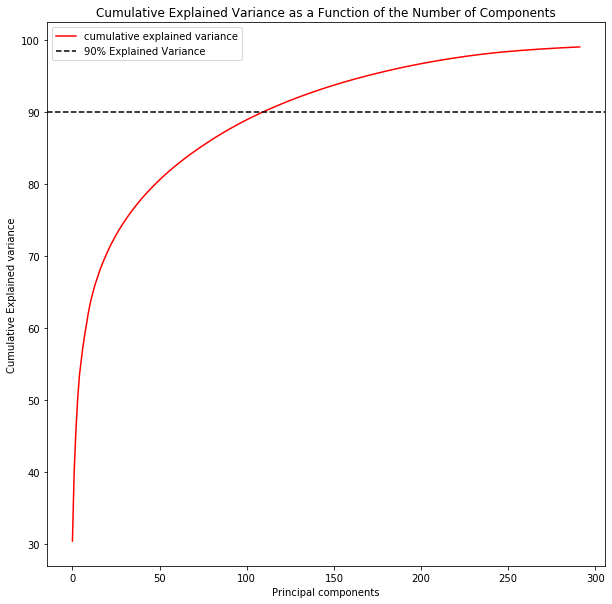

In [34]:
cumsum = np.cumsum(model.explained_variance_ratio_)*100
d = [n for n in range(len(cumsum))]
plt.figure(figsize=(10, 10))
plt.plot(d,cumsum, color = 'red',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 90, color='k', linestyle='--', label = '90% Explained Variance')
plt.legend(loc='best')

In [35]:
some_channel_index = np.random.choice(750,300)
some_set = standarting_images[some_channel_index]
some_set.shape

(300, 59212)

In [36]:
n_components = np.arange(50,300,25)
def func(n_components,some_set,shape_0,shape_1):
    models_data = []
    compressed_list_by_ncomponents = []
    mse_log_list = []
    mean_mse = []
    for i in n_components: 
        model1,compressed_images = image_PCA(some_set,i)
        models_data.append(model)
        compressed_list_by_ncomponents.append(compressed_images)
        reconstr = model1.inverse_transform(compressed_images)
        mse_log = np.array(list(map(mse,reconstr.reshape((300,shape_0,shape_1)),some_set.reshape((300,shape_0,shape_1)))))
        mse_log_list.append(mse_log)
        mean_mse.append(np.mean(mse_log))
    return n_components,np.array(mean_mse),np.array(mse_log_list)

In [37]:
ar = func(n_components,some_set,shape_0,shape_1)

## PCA is not the best choice for image compression especially  when images have low similarity

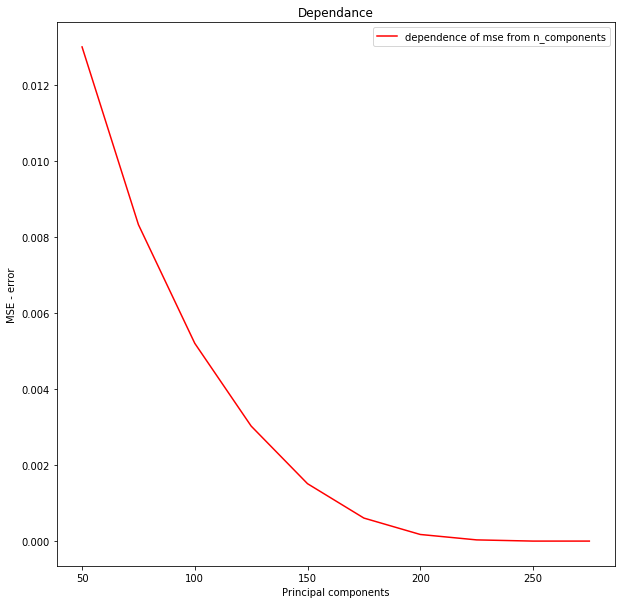

In [38]:
plt.figure(figsize=(10, 10))
plt.plot(ar[0],ar[1],color = 'red',label='dependence of mse from n_components')
plt.title('Dependance')
plt.ylabel('MSE - error')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

Провести моделювання окремих каналів кольору зображень з використанням марковських ланцюгів: a. Для кожного каналу кольору кожного зображення розрахувати стохастическую матрицю марковської ланцюга першого і другого порядків (обробка пікселів по горизонталі справа наліво і навпаки, а також по вертикалі зверху вниз і навпаки). У звіті привести явний вигляд однієї марковської ланцюга для одного з каналів кольору тестового зображення; b. Перевірити властивість регулярності, реккурентное і незворотності (irreducible) для отриманих марковских моделей для 5 ітерацій.


In [39]:
ima = np.array(img_list())

In [41]:
resized_images = resize(ima,shape_0,shape_1)
imas = resized_images.reshape(250,shape_0,shape_1,3)


In [42]:
def Markov(images):
    ar = []
    for s in images:
        for i in range(3):
            arr = s[:,:,i].flatten()
            prev_color = arr[0]
            markov_matrix1 = np.zeros(shape=(256, 256))
            for i in range(len(arr) - 1):
                markov_matrix1[arr[i]][arr[i + 1]] += 1
            markov_matrix = markov_matrix1[0] / sum(markov_matrix1[0])
            for i in range(1, 256):
                markov_matrix = np.vstack((markov_matrix, markov_matrix1[i] / sum(markov_matrix1[i])))
            ar.append((markov_matrix,np.linalg.matrix_power(markov_matrix, 2)))

    return np.array(ar)




In [43]:
dat = Markov(imas)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


In [44]:
print('Стохастична матриця марковської ланцюга першого порядку',"\n",dat[1][0])
print("\n",'Стохастична матриця марковської ланцюга другого порядку',"\n",dat[1][1])

Стохастична матриця марковської ланцюга першого порядку 
 [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.11111111 0.        ]
 [0.         0.         0.         ... 0.09090909 0.         0.09090909]
 [0.         0.         0.         ... 0.         0.0212766  0.09574468]]

 Стохастична матриця марковської ланцюга другого порядку 
 [[0.         0.         0.         ... 0.         0.         0.00227551]
 [0.         0.         0.         ... 0.         0.         0.0052633 ]
 [0.         0.         0.         ... 0.         0.         0.00208333]
 ...
 [0.         0.         0.         ... 0.0189899  0.         0.0371495 ]
 [0.         0.         0.         ... 0.00363636 0.01208128 0.03235824]
 [0.00085606 0.         0.         ... 0.00239626 0.00215562 0.01538

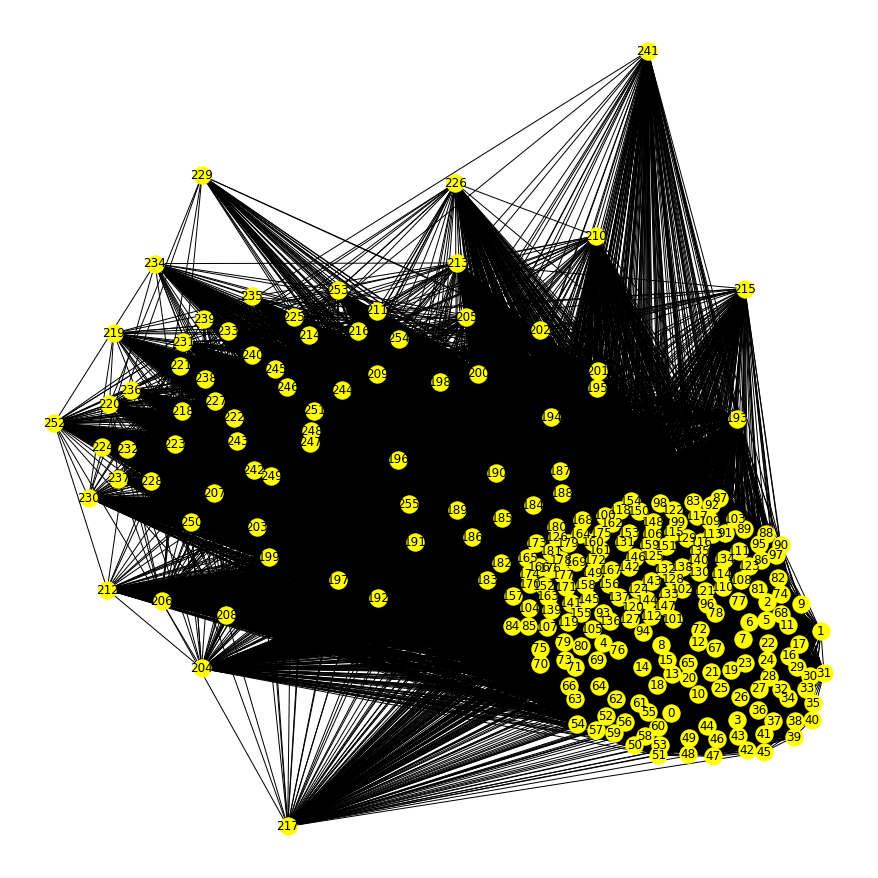

In [112]:
data = dat[1][1]
data = np.triu(data) + np.triu(data).T
ind = [str(i) for i in range(data.shape[0])]
df2 = pd.DataFrame(data, index=ind, columns=ind)
plt.figure(1,figsize=(12,12))  
G2 = nx.from_pandas_adjacency(df2)

nx.draw(G2, with_labels=True, node_color='yellow')
plt.show()

In [122]:
test = pd.DataFrame(dat[0][0])
test

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.200000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.2,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000433,0.000000,0.000433,0.005635,0.072388,0.827915,0.044213,0.021240,0.003034,0.002167
252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000390,0.000779,0.003506,0.023763,0.086093,0.859758,0.021426,0.000779,0.002727
253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000532,0.000000,0.000532,0.000532,0.006919,0.021288,0.062267,0.899947,0.004258,0.002661
254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.017241,0.017241,0.051724,0.172414,0.293103,0.310345,0.051724,0.051724


In [140]:
import quantecon as qe
def regularity_check(matrix):
    counter = 0
    for a in range(1,6):
        matrix = np.linalg.matrix_power(matrix,a)

        for i in range(matrix.shape[0]):
            for j in range(matrix.shape[1]):
                if matrix[i,j] < 0:
                    counter += 1 
        print('iteration: ' , a, 'negative elements: ' ,counter)
        
regularity_check(dat[0][0])
print('Для 5 ітерації ,виконується умова регулярності.Модель регулярна ')

P = dat[0][0]
mc = qe.MarkovChain(P, [str(i) for i in range(0,256)])
print('Модель незворотня -  ', mc.is_irreducible)
print('Рекурентную називають модель M  яка з ймовірністю в P = 1 при покиданні стану вернеться в цей стан за час t < inf,у майбутньму')
print("Кількість рекурентних станів " ,np.shape(mc.recurrent_classes)[1])
if np.shape(mc.recurrent_classes_indices)[1] == 256:
    print('Усі стани моделі рекурентні ,модель рекурентна ')
else :
    print('Модель не рекурентна' )

iteration:  1 negative elements:  0
iteration:  2 negative elements:  0
iteration:  3 negative elements:  0
iteration:  4 negative elements:  0
iteration:  5 negative elements:  0
Для 5 ітерації ,виконується умова регулярності.Модель регулярна 
Модель незворотня -   True
Рекурентную називають модель M  яка з ймовірністю в P = 1 при покиданні стану вернеться в цей стан за час t < inf,у майбутньму
Кількість рекурентних станів  256
Усі стани моделі рекурентні ,модель рекурентна 


In [120]:
np.shape(mc.recurrent_classes_indices)

(1, 256)

In [ ]:
Усі стани(256) моделі рекурентні ,модель рекурентна 